# Introduction

In my previous project (Provider Appointment Availability), we calculate the difference between survey date, and urgent and non-urgent appointments for health care providers contracted with Kentucky Medicaid.

The survey was conducted by vendor via telephone between February 15 to March 24, 2022. The survey was conducted to collect the first available urgent and non-urgent appointment date and time.

Click here to view my previous project: https://colab.research.google.com/drive/16jN5pbvAwbe141f1FOvTwKW3stZ4gpF2?usp=sharing#scrollTo=2a7cfd60

The scope of this project is to generate a Contact List (CL) for vendor, to conduct the telephone survey. The vendor will use the CL to contact providers' office and collect providers appointment date and time availability for Measurement Year (MY) 2023.

Please note, the raw data used in this project is downloaded from Center of Medicare and Medicaid's (CMS) website.[1]

Source:
[1] https://data.cms.gov/provider-data/dataset/mj5m-pzi6

This program will analyze the data downloaded from CMS website and generate the Contact List.

Analyze data:
* Import data downloaded from CMS website into the program.
* Select only required columns to identify providers, such as NPI, First_Name, Last_Name, Type_of_Licensure, Address, City, State, Zip_Code, and Phone_Number, etc.
* Clean data, such as Phone_number, and remove any null or invalid phone numbers.
* Select providers from Kentucky only for CL.
* Sample data using Python function to select random sample.
* Bump sampled data against Provider Appointment Availability survey data to check if the selected providers were contacted in last survey.

Display analyzed data in charts:
* Display sampled data using charts.
* By provider type/ by county

In [218]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [219]:
data_types = {23: str}  # Column 23 will be treated as string
df = pd.read_csv("data_DACNationalProvider.csv", dtype=data_types)
df

,NPI,Ind_PAC_ID,Ind_enrl_ID,lst_nm,frst_nm,mid_nm,suff,gndr,Cred,Med_sch,...,adr_ln_1,adr_ln_2,ln_2_sprs,cty,st,zip,phn_numbr,ind_assgn,grp_assgn,adrs_id
0,1003008095,3678666054,I20070830000131,HOUSE,ROBIN,R,NaN,F,NaN,OTHER,...,2867 CUMBERLAND FALLS HWY,NaN,NaN,CORBIN,KY,407018848,6.065235e+09,Y,Y,KY407018848CO2867XHWYX400
1,1003008095,3678666054,I20070830000131,HOUSE,ROBIN,R,NaN,F,NaN,OTHER,...,1025 SAINT JOSEPH LN,NaN,NaN,LONDON,KY,407418345,6.063302e+09,Y,Y,KY407418345LO1025XLNXX400
2,1003008095,3678666054,I20070830000131,HOUSE,ROBIN,R,NaN,F,NaN,OTHER,...,649 MEYERS BAKER RD,SUITE 102,NaN,LONDON,KY,407413006,6.068647e+09,Y,Y,KY407413006LO649XXRDXX402
3,1003010539,2668571191,I20111022000054,STEWART,RICHARD,NaN,NaN,M,DO,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",...,4900 HOUSTON RD,NaN,NaN,FLORENCE,KY,410424824,8.592125e+09,Y,Y,KY410424824FL4900XRDXX300
4,1003010539,2668571191,I20111022000054,STEWART,RICHARD,NaN,NaN,M,DO,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",...,85 N GRAND AVE,NaN,NaN,FORT THOMAS,KY,410751793,8.595724e+09,Y,Y,KY410751793FO85XXXAVEX400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151414,1427086933,840293924,I20060825000196,NASSAB,PAUL,NaN,NaN,M,MD,BOSTON UNIVERSITY SCHOOL OF MEDICINE,...,9221-9223 NE HWY 152,NaN,NaN,KANSAS CITY,MO,641587608,8.167922e+09,Y,Y,MO641587608KA92219152X500
151415,1427087972,3678606597,I20100729000242,WU,TZYY-CHOOU,NaN,NaN,M,NaN,OTHER,...,600 N WOLFE ST,NaN,NaN,BALTIMORE,MD,212870005,4.109555e+09,Y,Y,MD212870005BA600XXSTXX400
151416,1427088012,8224127725,I20100813000549,KRAHN,MICHAEL,J,NaN,M,NaN,"UNIVERSITY OF MISSOURI, KANSAS CITY, SCHOOL OF...",...,2800 CLAY EDWARDS DR,NORTHLAND RADIOLOGY,NaN,N KANSAS CITY,MO,641163220,9.136425e+09,Y,Y,MO641163220NX2800XDRXX402
151417,1427088012,8224127725,I20100813000549,KRAHN,MICHAEL,J,NaN,M,NaN,"UNIVERSITY OF MISSOURI, KANSAS CITY, SCHOOL OF...",...,5501 NW 62ND TERRACE,200 TREMONT MEDICAL IMAGING,NaN,KANSAS CITY,MO,641512408,8.166918e+09,Y,Y,MO641512408KA5501XTERR403


In [220]:
df.columns

Index(['NPI', 'Ind_PAC_ID', 'Ind_enrl_ID', 'lst_nm', 'frst_nm', 'mid_nm',
       'suff', 'gndr', 'Cred', 'Med_sch', 'Grd_yr', 'pri_spec', 'sec_spec_1',
       'sec_spec_2', 'Telehlth', 'org_nm', 'org_pac_id', 'num_org_mem',
       'adr_ln_1', 'adr_ln_2', 'ln_2_sprs', 'cty', 'st', 'zip', 'phn_numbr',
       'ind_assgn', 'grp_assgn', 'adrs_id'],
      dtype='object')

In [221]:
# Drop columns not needed and rename columns
df_new = df[['NPI', 'lst_nm', 'frst_nm', 'Cred', 'pri_spec', 'Med_sch', 'adr_ln_1', 'adr_ln_2', 'cty', 'st', 'zip', 'phn_numbr',
              'adrs_id']].rename(columns={'lst_nm': 'Last_Name', 'frst_nm': 'First_Name', 'Cred': 'Type_of_Licensure',
                                          'pri_spec' : 'Specialty', 'adr_ln_1': 'Address_1', 'adr_ln_2': 'Address_2', 'cty': 'City', 'st': 'State',
                                          'zip': 'Zip', 'phn_numbr': 'Phone', 'adrs_id': 'PseudoAddressID'})

In [222]:
df_new

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID
0,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,2867 CUMBERLAND FALLS HWY,NaN,CORBIN,KY,407018848,6.065235e+09,KY407018848CO2867XHWYX400
1,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,1025 SAINT JOSEPH LN,NaN,LONDON,KY,407418345,6.063302e+09,KY407418345LO1025XLNXX400
2,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,649 MEYERS BAKER RD,SUITE 102,LONDON,KY,407413006,6.068647e+09,KY407413006LO649XXRDXX402
3,1003010539,STEWART,RICHARD,DO,EMERGENCY MEDICINE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",4900 HOUSTON RD,NaN,FLORENCE,KY,410424824,8.592125e+09,KY410424824FL4900XRDXX300
4,1003010539,STEWART,RICHARD,DO,EMERGENCY MEDICINE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",85 N GRAND AVE,NaN,FORT THOMAS,KY,410751793,8.595724e+09,KY410751793FO85XXXAVEX400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151414,1427086933,NASSAB,PAUL,MD,ORTHOPEDIC SURGERY,BOSTON UNIVERSITY SCHOOL OF MEDICINE,9221-9223 NE HWY 152,NaN,KANSAS CITY,MO,641587608,8.167922e+09,MO641587608KA92219152X500
151415,1427087972,WU,TZYY-CHOOU,NaN,PATHOLOGY,OTHER,600 N WOLFE ST,NaN,BALTIMORE,MD,212870005,4.109555e+09,MD212870005BA600XXSTXX400
151416,1427088012,KRAHN,MICHAEL,NaN,DIAGNOSTIC RADIOLOGY,"UNIVERSITY OF MISSOURI, KANSAS CITY, SCHOOL OF...",2800 CLAY EDWARDS DR,NORTHLAND RADIOLOGY,N KANSAS CITY,MO,641163220,9.136425e+09,MO641163220NX2800XDRXX402
151417,1427088012,KRAHN,MICHAEL,NaN,DIAGNOSTIC RADIOLOGY,"UNIVERSITY OF MISSOURI, KANSAS CITY, SCHOOL OF...",5501 NW 62ND TERRACE,200 TREMONT MEDICAL IMAGING,KANSAS CITY,MO,641512408,8.166918e+09,MO641512408KA5501XTERR403


In [223]:
df_new.dtypes

NPI                    int64
Last_Name             object
First_Name            object
Type_of_Licensure     object
Specialty             object
Med_sch               object
Address_1             object
Address_2             object
City                  object
State                 object
Zip                   object
Phone                float64
PseudoAddressID       object
dtype: object

In [224]:
pro_new = pd.DataFrame(df_new)

# Function to extract the first 5 digits of the ZIP code
def extract_first_5_digits(zip_code):
    if pd.notna(zip_code):
        return str(zip_code)[:5]
    else:
        return ""

# Function to format phone numbers as "111-111-1111"
def format_phone(phone_num):
    if pd.notna(phone_num):
        phone_int = int(phone_num)
        phone_str = str(phone_int)
        return f"{phone_str[:3]}-{phone_str[3:6]}-{phone_str[6:]}"
    else:
        return ""

# Applying the conversion functions to the ZIP and Phone columns in the DataFrame
pro_new['Zip'] = pro_new['Zip'].apply(extract_first_5_digits)
pro_new['Phone'] = pro_new['Phone'].apply(format_phone)

# Display the dataframe with formatted Zip and Phone Number.
pro_new

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID
0,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,2867 CUMBERLAND FALLS HWY,NaN,CORBIN,KY,40701,606-523-5402,KY407018848CO2867XHWYX400
1,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,1025 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-2377,KY407418345LO1025XLNXX400
2,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,649 MEYERS BAKER RD,SUITE 102,LONDON,KY,40741,606-864-7316,KY407413006LO649XXRDXX402
3,1003010539,STEWART,RICHARD,DO,EMERGENCY MEDICINE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",4900 HOUSTON RD,NaN,FLORENCE,KY,41042,859-212-5441,KY410424824FL4900XRDXX300
4,1003010539,STEWART,RICHARD,DO,EMERGENCY MEDICINE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",85 N GRAND AVE,NaN,FORT THOMAS,KY,41075,859-572-3617,KY410751793FO85XXXAVEX400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151414,1427086933,NASSAB,PAUL,MD,ORTHOPEDIC SURGERY,BOSTON UNIVERSITY SCHOOL OF MEDICINE,9221-9223 NE HWY 152,NaN,KANSAS CITY,MO,64158,816-792-2266,MO641587608KA92219152X500
151415,1427087972,WU,TZYY-CHOOU,NaN,PATHOLOGY,OTHER,600 N WOLFE ST,NaN,BALTIMORE,MD,21287,410-955-5000,MD212870005BA600XXSTXX400
151416,1427088012,KRAHN,MICHAEL,NaN,DIAGNOSTIC RADIOLOGY,"UNIVERSITY OF MISSOURI, KANSAS CITY, SCHOOL OF...",2800 CLAY EDWARDS DR,NORTHLAND RADIOLOGY,N KANSAS CITY,MO,64116,913-642-4900,MO641163220NX2800XDRXX402
151417,1427088012,KRAHN,MICHAEL,NaN,DIAGNOSTIC RADIOLOGY,"UNIVERSITY OF MISSOURI, KANSAS CITY, SCHOOL OF...",5501 NW 62ND TERRACE,200 TREMONT MEDICAL IMAGING,KANSAS CITY,MO,64151,816-691-8000,MO641512408KA5501XTERR403


In [225]:
# Select providers from Kentucky only
providers_ky = pro_new[pro_new['State'] == 'KY']

# Display the filtered DataFrame containing providers from KY
providers_ky

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID
0,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,2867 CUMBERLAND FALLS HWY,NaN,CORBIN,KY,40701,606-523-5402,KY407018848CO2867XHWYX400
1,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,1025 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-2377,KY407418345LO1025XLNXX400
2,1003008095,HOUSE,ROBIN,NaN,NURSE PRACTITIONER,OTHER,649 MEYERS BAKER RD,SUITE 102,LONDON,KY,40741,606-864-7316,KY407413006LO649XXRDXX402
3,1003010539,STEWART,RICHARD,DO,EMERGENCY MEDICINE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",4900 HOUSTON RD,NaN,FLORENCE,KY,41042,859-212-5441,KY410424824FL4900XRDXX300
4,1003010539,STEWART,RICHARD,DO,EMERGENCY MEDICINE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",85 N GRAND AVE,NaN,FORT THOMAS,KY,41075,859-572-3617,KY410751793FO85XXXAVEX400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,1427072990,MILLER,BETH,MD,ALLERGY/IMMUNOLOGY,UNIVERSITY OF TOLEDO COLLEGE OF MEDICINE,2400 GREATSTONE PT,NaN,LEXINGTON,KY,40504,,KY405043274LE2400XPTXX300
14634,1427076173,BRUNEAU,DENISE,MD,OBSTETRICS/GYNECOLOGY,UNIVERSITY OF LOUISVILLE SCHOOL OF MEDICINE,2201 LEXINGTON AVE,NaN,ASHLAND,KY,41101,800-967-2289,KY411012843AS2201XAVEX300
14635,1427081348,HOWELL,MICHELLE,OD,OPTOMETRY,OTHER,3970 TURKEYFOOT RD,NaN,ERLANGER,KY,41018,859-534-1498,KY410182840ER3970XRDXX300
14636,1427087857,BARTOLAC,TIFFANI,NaN,NURSE PRACTITIONER,UNIVERSITY OF CINCINNATI COLLEGE OF MEDICINE,1 MEDICAL VILLAGE DR,NaN,EDGEWOOD,KY,41017,859-212-4468,KY410173403ED1XXXXDRXX400


In [226]:
providers_ky['Specialty'].unique()

array(['NURSE PRACTITIONER', 'EMERGENCY MEDICINE', 'FAMILY PRACTICE',
       'DIAGNOSTIC RADIOLOGY',
       'CERTIFIED REGISTERED NURSE ANESTHETIST (CRNA)',
       'VASCULAR SURGERY', 'ANESTHESIOLOGY',
       'CARDIOVASCULAR DISEASE (CARDIOLOGY)', 'QUALIFIED AUDIOLOGIST',
       'INTERNAL MEDICINE', 'OPTOMETRY', 'PHYSICIAN ASSISTANT',
       'ALLERGY/IMMUNOLOGY', 'CLINICAL SOCIAL WORKER',
       'PULMONARY DISEASE', 'PSYCHIATRY', 'OBSTETRICS/GYNECOLOGY',
       'DERMATOLOGY', 'PHYSICAL THERAPY', 'ENDOCRINOLOGY',
       'SPORTS MEDICINE', 'UROLOGY', 'PATHOLOGY', 'HEMATOLOGY/ONCOLOGY',
       'HOSPITALIST', 'PODIATRY', 'GASTROENTEROLOGY', 'NEPHROLOGY',
       'NEUROLOGY', 'HOSPICE/PALLIATIVE CARE', 'GENERAL SURGERY',
       'CARDIAC SURGERY', 'OPHTHALMOLOGY', 'NEUROSURGERY',
       'OTOLARYNGOLOGY', 'INTERVENTIONAL RADIOLOGY', 'RADIATION ONCOLOGY',
       'GENERAL PRACTICE', 'INFECTIOUS DISEASE', 'PEDIATRIC MEDICINE',
       'ORTHOPEDIC SURGERY', 'CHIROPRACTIC', 'CLINICAL PSYCHOLOGIST',


In [227]:

# Filter providers_ky dataframe based on specified specialties
selected_specialties = ['FAMILY PRACTICE', 'INTERNAL MEDICINE', 'OBSTETRICS/GYNECOLOGY', 'PEDIATRICS']
providers_ky = providers_ky[providers_ky['Specialty'].isin(selected_specialties)]

# Display the dataframe with selected providers specialties
providers_ky

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID
5,1003012428,PATEL,VIRAL,NaN,FAMILY PRACTICE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",405 VIOLET RD,NaN,CRITTENDEN,KY,41030,859-428-1610,KY410308956CR405XXRDXX300
23,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,1700 NICHOLASVILLE RD,NaN,LEXINGTON,KY,40503,,KY405031431LE1700XRDXX300
24,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,859-260-4390,KY405173094LE4071XDRXX502
49,1003123084,OZOR,UCHENNA,NaN,INTERNAL MEDICINE,OTHER,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202,502-629-5552,KY402021831LO200XXSTXX403
53,1003129917,CASTELLANOS,CELIA,NaN,INTERNAL MEDICINE,OTHER,800 ROSE ST,NaN,LEXINGTON,KY,40536,859-323-5000,KY405360001LE800XXSTXX300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14588,1427036185,OVERLEY,ANA,NaN,INTERNAL MEDICINE,OTHER,825 BARRET AVE,NaN,LOUISVILLE,KY,40204,502-272-5165,KY402041743LO825XXAVEX300
14601,1427054378,VEERAMACHANENI,RADHIKA,NaN,INTERNAL MEDICINE,OTHER,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212,502-774-8631,KY402121033LO2215XAVEX300
14622,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-6000,KY407418345LO1001XLNXX400
14623,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,,KY407418345LO1001XLNXX400


In [288]:
# Add a new column 'Invalid' based on condition
providers_ky1 = providers_ky.copy()
providers_ky1['Invalid'] = np.where((providers_ky1['NPI'] == '') | (providers_ky1['Phone'] == ''), 'Y', '')

# Display the updated DataFrame
providers_ky1

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID,Invalid
5,1003012428,PATEL,VIRAL,NaN,FAMILY PRACTICE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",405 VIOLET RD,NaN,CRITTENDEN,KY,41030,859-428-1610,KY410308956CR405XXRDXX300,
23,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,1700 NICHOLASVILLE RD,NaN,LEXINGTON,KY,40503,,KY405031431LE1700XRDXX300,Y
24,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,859-260-4390,KY405173094LE4071XDRXX502,
49,1003123084,OZOR,UCHENNA,NaN,INTERNAL MEDICINE,OTHER,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202,502-629-5552,KY402021831LO200XXSTXX403,
53,1003129917,CASTELLANOS,CELIA,NaN,INTERNAL MEDICINE,OTHER,800 ROSE ST,NaN,LEXINGTON,KY,40536,859-323-5000,KY405360001LE800XXSTXX300,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14588,1427036185,OVERLEY,ANA,NaN,INTERNAL MEDICINE,OTHER,825 BARRET AVE,NaN,LOUISVILLE,KY,40204,502-272-5165,KY402041743LO825XXAVEX300,
14601,1427054378,VEERAMACHANENI,RADHIKA,NaN,INTERNAL MEDICINE,OTHER,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212,502-774-8631,KY402121033LO2215XAVEX300,
14622,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-6000,KY407418345LO1001XLNXX400,
14623,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,,KY407418345LO1001XLNXX400,Y


In [289]:
# Remove leading and trailing spaces from the 'City' to perform join later with County
new_dataframe_copy = providers_ky1.copy()
new_dataframe_copy['City'] = new_dataframe_copy['City'].str.strip()
new_dataframe_copy

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID,Invalid
5,1003012428,PATEL,VIRAL,NaN,FAMILY PRACTICE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",405 VIOLET RD,NaN,CRITTENDEN,KY,41030,859-428-1610,KY410308956CR405XXRDXX300,
23,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,1700 NICHOLASVILLE RD,NaN,LEXINGTON,KY,40503,,KY405031431LE1700XRDXX300,Y
24,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,859-260-4390,KY405173094LE4071XDRXX502,
49,1003123084,OZOR,UCHENNA,NaN,INTERNAL MEDICINE,OTHER,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202,502-629-5552,KY402021831LO200XXSTXX403,
53,1003129917,CASTELLANOS,CELIA,NaN,INTERNAL MEDICINE,OTHER,800 ROSE ST,NaN,LEXINGTON,KY,40536,859-323-5000,KY405360001LE800XXSTXX300,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14588,1427036185,OVERLEY,ANA,NaN,INTERNAL MEDICINE,OTHER,825 BARRET AVE,NaN,LOUISVILLE,KY,40204,502-272-5165,KY402041743LO825XXAVEX300,
14601,1427054378,VEERAMACHANENI,RADHIKA,NaN,INTERNAL MEDICINE,OTHER,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212,502-774-8631,KY402121033LO2215XAVEX300,
14622,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-6000,KY407418345LO1001XLNXX400,
14623,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,,KY407418345LO1001XLNXX400,Y


In [235]:
# Remove invaild data from dataframe
new_table_y = new_dataframe_copy[new_dataframe_copy['Invalid'] != 'Y']

# Display the new DataFrame
new_table_y

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State,Zip,Phone,PseudoAddressID,Invalid
5,1003012428,PATEL,VIRAL,NaN,FAMILY PRACTICE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",405 VIOLET RD,NaN,CRITTENDEN,KY,41030,859-428-1610,KY410308956CR405XXRDXX300,
24,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,859-260-4390,KY405173094LE4071XDRXX502,
49,1003123084,OZOR,UCHENNA,NaN,INTERNAL MEDICINE,OTHER,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202,502-629-5552,KY402021831LO200XXSTXX403,
53,1003129917,CASTELLANOS,CELIA,NaN,INTERNAL MEDICINE,OTHER,800 ROSE ST,NaN,LEXINGTON,KY,40536,859-323-5000,KY405360001LE800XXSTXX300,
56,1003131889,LEWIS,LAUREN,NaN,OBSTETRICS/GYNECOLOGY,DUKE UNIVERSITY SCHOOL OF MEDICINE,3900 KRESGE WAY,SUITE 30,LOUISVILLE,KY,40207,502-891-8700,KY402074680LO3900XWAYX301,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,1427034057,CRUM,AARON,NaN,OBSTETRICS/GYNECOLOGY,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,184 S MAYO TRAIL,NaN,PIKEVILLE,KY,41501,606-430-2213,KY415011518PI184XXTRAI400,
14588,1427036185,OVERLEY,ANA,NaN,INTERNAL MEDICINE,OTHER,825 BARRET AVE,NaN,LOUISVILLE,KY,40204,502-272-5165,KY402041743LO825XXAVEX300,
14601,1427054378,VEERAMACHANENI,RADHIKA,NaN,INTERNAL MEDICINE,OTHER,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212,502-774-8631,KY402121033LO2215XAVEX300,
14622,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-6000,KY407418345LO1001XLNXX400,


In [254]:
# Create new dataframe with Address Columns only to perform join with County table in next step.
address_only = new_table_y.copy()
address_only = address_only[['Address_1', 'Address_2','City', 'State','Zip']]
address_only

,Address_1,Address_2,City,State,Zip
5,405 VIOLET RD,NaN,CRITTENDEN,KY,41030
24,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517
49,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202
53,800 ROSE ST,NaN,LEXINGTON,KY,40536
56,3900 KRESGE WAY,SUITE 30,LOUISVILLE,KY,40207
...,...,...,...,...,...
14585,184 S MAYO TRAIL,NaN,PIKEVILLE,KY,41501
14588,825 BARRET AVE,NaN,LOUISVILLE,KY,40204
14601,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212
14622,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741


In [237]:
# Import data file with City and County names
df_county = pd.read_csv("CityCounty.csv")
df_county

,City,County
0,ADAIRVILLE,LOGAN
1,ADAMS,LAWRENCE
2,ADOLPHUS,ALLEN
3,ALBANY,CLINTON
4,ALEXANDRIA,CAMPBELL
...,...,...
723,WORTHINGTON,GREENUP
724,WORTHVILLE,CARROLL
725,YEADDISS,LESLIE
726,YOSEMITE,CASEY


In [244]:
# Trim columns to remove leading and trailing spaces
df_county1 = df_county.copy()
df_county1[['City', 'County']] = df_county1[['City', 'County']].apply(lambda x: x.str.strip())
df_county1

,City,County
0,ADAIRVILLE,LOGAN
1,ADAMS,LAWRENCE
2,ADOLPHUS,ALLEN
3,ALBANY,CLINTON
4,ALEXANDRIA,CAMPBELL
...,...,...
723,WORTHINGTON,GREENUP
724,WORTHVILLE,CARROLL
725,YEADDISS,LESLIE
726,YOSEMITE,CASEY


In [255]:
# Merge DataFrames on 'City'
address_merged = address_only.merge(df_county1[['City', 'County']], on='City', how='left')

# Drop the duplicate 'City' column
#merged_df.drop(columns='Invalid', inplace=True)

# Display the merged dataframe
address_merged

,Address_1,Address_2,City,State,Zip,County
0,405 VIOLET RD,NaN,CRITTENDEN,KY,41030,GRANT
1,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,FAYETTE
2,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,FAYETTE
3,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,FAYETTE
4,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,FAYETTE
...,...,...,...,...,...,...
17401,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212,JEFFERSON
17402,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,LAUREL
17403,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,LAUREL
17404,2201 LEXINGTON AVE,NaN,ASHLAND,KY,41101,BOYD


In [256]:
# Remove duplicates created during merge.
address_merged = address_merged.drop_duplicates()
address_merged

,Address_1,Address_2,City,State,Zip,County
0,405 VIOLET RD,NaN,CRITTENDEN,KY,41030,GRANT
1,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,FAYETTE
15,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202,JEFFERSON
46,800 ROSE ST,NaN,LEXINGTON,KY,40536,FAYETTE
60,3900 KRESGE WAY,SUITE 30,LOUISVILLE,KY,40207,JEFFERSON
...,...,...,...,...,...,...
17244,1 TRILLIUM WAY,MTM/DSM,CORBIN,KY,40701,WHITLEY
17273,9115 LEESGATE RD,C,LOUISVILLE,KY,40222,JEFFERSON
17335,3066 CAMPBELLSVILLE RD,NaN,COLUMBIA,KY,42728,ADAIR
17336,126 DANIEL DR,SUITE B,DANVILLE,KY,40422,BOYLE


In [257]:
# This is test to check number of unique address before merge. It matches after merging and removing the duplicates 
address_only12 = address_only.copy()
address_only12 = address_only12.drop_duplicates()
address_only12

,Address_1,Address_2,City,State,Zip
5,405 VIOLET RD,NaN,CRITTENDEN,KY,41030
24,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517
49,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202
53,800 ROSE ST,NaN,LEXINGTON,KY,40536
56,3900 KRESGE WAY,SUITE 30,LOUISVILLE,KY,40207
...,...,...,...,...,...
14541,1 TRILLIUM WAY,MTM/DSM,CORBIN,KY,40701
14549,9115 LEESGATE RD,C,LOUISVILLE,KY,40222
14569,3066 CAMPBELLSVILLE RD,NaN,COLUMBIA,KY,42728
14570,126 DANIEL DR,SUITE B,DANVILLE,KY,40422


In [260]:
# Now merge 'merged_address' table to 'new_table_y' 
provider_list = new_table_y.merge(address_merged[['Address_1', 'Address_2', 'City', 'State', 'Zip', 'County']],
                                  on=['Address_1', 'Address_2','City','Zip'], how='left')

# Print df
provider_list

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State_x,Zip,Phone,PseudoAddressID,Invalid,State_y,County
0,1003012428,PATEL,VIRAL,NaN,FAMILY PRACTICE,"UNIVERSITY OF PIKEVILLE, KENTUCKY COLLEGE OF O...",405 VIOLET RD,NaN,CRITTENDEN,KY,41030,859-428-1610,KY410308956CR405XXRDXX300,,KY,GRANT
1,1003075243,KALANTAR,MASOUD,NaN,INTERNAL MEDICINE,OTHER,4071 TATES CREEK CENTRE DR,SUITE 202,LEXINGTON,KY,40517,859-260-4390,KY405173094LE4071XDRXX502,,KY,FAYETTE
2,1003123084,OZOR,UCHENNA,NaN,INTERNAL MEDICINE,OTHER,200 E CHESTNUT ST,BLDG SUITE303,LOUISVILLE,KY,40202,502-629-5552,KY402021831LO200XXSTXX403,,KY,JEFFERSON
3,1003129917,CASTELLANOS,CELIA,NaN,INTERNAL MEDICINE,OTHER,800 ROSE ST,NaN,LEXINGTON,KY,40536,859-323-5000,KY405360001LE800XXSTXX300,,KY,FAYETTE
4,1003131889,LEWIS,LAUREN,NaN,OBSTETRICS/GYNECOLOGY,DUKE UNIVERSITY SCHOOL OF MEDICINE,3900 KRESGE WAY,SUITE 30,LOUISVILLE,KY,40207,502-891-8700,KY402074680LO3900XWAYX301,,KY,JEFFERSON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1427034057,CRUM,AARON,NaN,OBSTETRICS/GYNECOLOGY,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,184 S MAYO TRAIL,NaN,PIKEVILLE,KY,41501,606-430-2213,KY415011518PI184XXTRAI400,,KY,PIKE
1763,1427036185,OVERLEY,ANA,NaN,INTERNAL MEDICINE,OTHER,825 BARRET AVE,NaN,LOUISVILLE,KY,40204,502-272-5165,KY402041743LO825XXAVEX300,,KY,JEFFERSON
1764,1427054378,VEERAMACHANENI,RADHIKA,NaN,INTERNAL MEDICINE,OTHER,2215 PORTLAND AVE,NaN,LOUISVILLE,KY,40212,502-774-8631,KY402121033LO2215XAVEX300,,KY,JEFFERSON
1765,1427068782,FANOS,KATHLEEN,MD,INTERNAL MEDICINE,DES MOINES UNIVERSITY OF OSTEOPATHIC MEDICINE ...,1001 SAINT JOSEPH LN,NaN,LONDON,KY,40741,606-330-6000,KY407418345LO1001XLNXX400,,KY,LAUREL


In [261]:
# For selecting a specific number of random rows for survey
survey_sample = provider_list.sample(n=1500)
survey_sample

,NPI,Last_Name,First_Name,Type_of_Licensure,Specialty,Med_sch,Address_1,Address_2,City,State_x,Zip,Phone,PseudoAddressID,Invalid,State_y,County
594,1134530546,WILLIAMSON,KATHERINE,NaN,OBSTETRICS/GYNECOLOGY,OTHER,2605 KENTUCKY AVE,SUITE 301,PADUCAH,KY,42003,270-443-1220,KY420033802PA2605XAVEX302,,KY,MCCRACKEN
43,1003887381,GUNDUMALLA,GOPI,MD,INTERNAL MEDICINE,OTHER,9 LINVILLE DR,NaN,PARIS,KY,40361,859-987-3600,KY403612129PA9XXXXDRXX300,,KY,BOURBON
590,1134383854,MOORE,ERIN,NaN,INTERNAL MEDICINE,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,1221 S BROADWAY,NaN,LEXINGTON,KY,40504,859-258-4000,KY405042701LE1221XBROA300,,KY,FAYETTE
316,1073514345,TREVOR,DEVIN,NaN,OBSTETRICS/GYNECOLOGY,UNIVERSITY OF LOUISVILLE SCHOOL OF MEDICINE,523 PARK ST,NaN,BOWLING GREEN,KY,42101,270-781-0075,KY421011765BO523XXSTXX300,,KY,WARREN
983,1235391566,COFFIE,RAMONA,NaN,FAMILY PRACTICE,UNIVERSITY OF LOUISVILLE SCHOOL OF MEDICINE,1679 N WILSON RD,SUITE 110,RADCLIFF,KY,40160,270-272-0000,KY401601569RA1679XRDXX401,,KY,HARDIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1396164182,FIELDS,ALECIA,NaN,OBSTETRICS/GYNECOLOGY,OTHER,333 BOGLE ST,NaN,SOMERSET,KY,42503,606-678-0705,KY425032873SO333XXSTXX300,,KY,PULASKI
1609,1386687457,SIMS,CHRISTOPHER,MD,FAMILY PRACTICE,UNIVERSITY OF LOUISVILLE SCHOOL OF MEDICINE,14098 US HWY 27 S,NaN,WAYNESBURG,KY,40489,606-379-6646,KY404898253WA14098SXXX500,,KY,LINCOLN
1291,1316263684,YATES,JEFFREY,NaN,INTERNAL MEDICINE,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,1980 LITTON LN,NaN,HEBRON,KY,41048,859-334-8700,KY410488669HE1980XLNXX300,,KY,BOONE
438,1104146521,ROMOND,JOHN,NaN,INTERNAL MEDICINE,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,100 GREATSTONE PT,NaN,LEXINGTON,KY,40504,859-257-9800,KY405043274LE100XXPTXX300,,KY,FAYETTE


In [271]:
survey_sample['County'].nunique()

101

In [285]:
county_counts = survey_sample.groupby('County')['NPI'].count().reset_index()
county_counts.rename(columns={'NPI': 'Count'}, inplace=True)
county_counts

,County,Count
0,ADAIR,5
1,ALLEN,2
2,ANDERSON,6
3,BALLARD,1
4,BARREN,27
...,...,...
96,WASHINGTON,1
97,WAYNE,5
98,WEBSTER,2
99,WHITLEY,15


In [286]:
# Assuming you have a DataFrame called survey_sample with the 'NPI' and 'County' columns

# Step 1: Group data and count NPIs for each county
county_counts = survey_sample.groupby('County')['NPI'].count().reset_index()

# Step 2: Rename the 'NPI' column to 'Count'
county_counts.rename(columns={'NPI': 'Count'}, inplace=True)

# Step 3: Sort the DataFrame by 'Count' column in descending order
county_counts_sorted = county_counts.sort_values(by='Count', ascending=False)

# Step 4: Display the top 10 rows
top_10_counties = county_counts_sorted.head(10)
print(top_10_counties)


       County  Count
43  JEFFERSON    368
28    FAYETTE    175
7       BOONE     56
95     WARREN     54
37     HARDIN     36
82       PIKE     31
66  MCCRACKEN     30
41    HOPKINS     28
4      BARREN     27
29      FLOYD     27


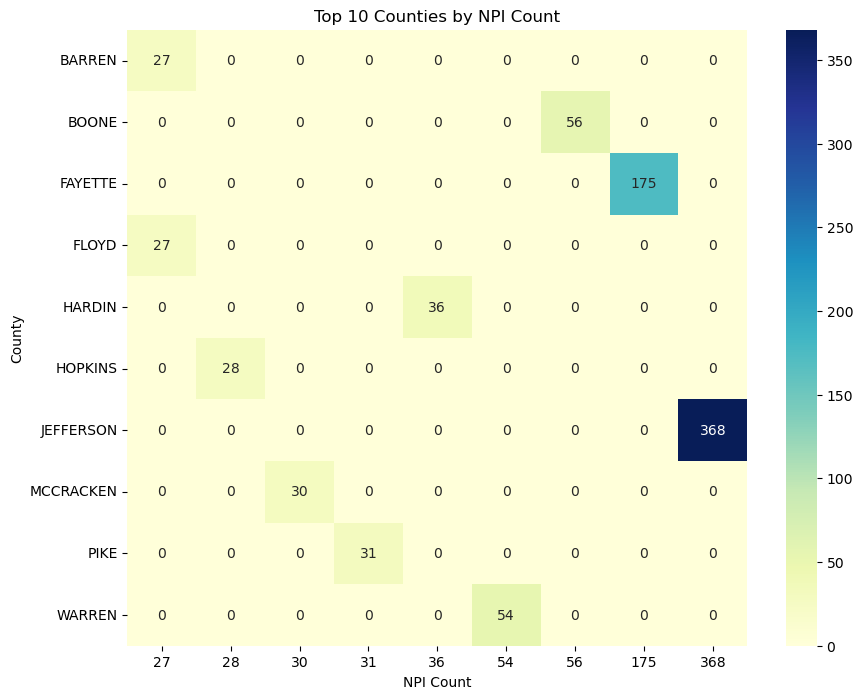

In [287]:
# Step 1: Sort the DataFrame by 'Count' column in descending order
county_counts_sorted = county_counts.sort_values(by='Count', ascending=False)

# Step 2: Take the top 10 rows for the heatmap
top_10_counties = county_counts_sorted.head(10)

# Step 3: Create a pivot table for the heatmap
heatmap_data = top_10_counties.pivot('County', 'Count', 'Count').fillna(0)

# Step 4: Create and display the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Top 10 Counties by NPI Count')
plt.xlabel('NPI Count')
plt.ylabel('County')
plt.show()

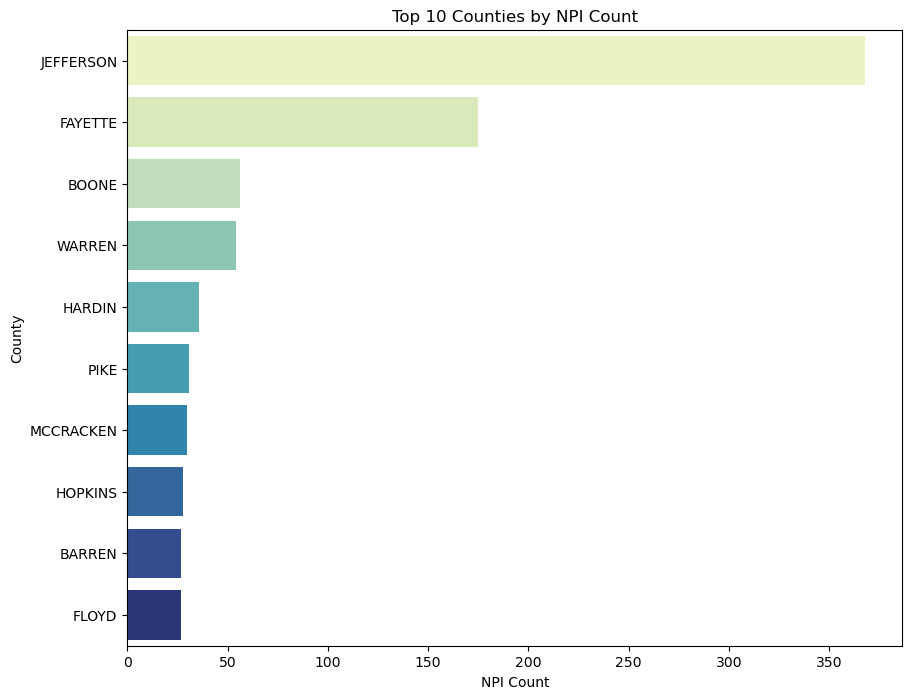

In [290]:
# Step 1: Sort the DataFrame by 'Count' column in descending order (Optional)
top_10_counties_sorted = top_10_counties.sort_values(by='Count', ascending=False)

# Step 2: Create the horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='County', data=top_10_counties_sorted, palette='YlGnBu')
plt.title('Top 10 Counties by NPI Count')
plt.xlabel('NPI Count')
plt.ylabel('County')
plt.show()

In [291]:
df_2022 = pd.read_csv("provider_appt_final.csv")
df_2022

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Specialty,Date_Survey,Time_Survey,Survey_Completed,Urgent_Appointment_Date,Urgent_Appointment_Time,Urg_Appt_Status,Non_Urgent_Appointment_Date,Non_Urgent_Appointment_Time,Non_Urg_Appt_Status
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,...,Internal Medicine,3/3/22,8:00 AM,Yes,3/7/22,1:00 PM,Noncompliant,4/18/22,8:45 AM,Noncompliant
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,...,General Practice,2/18/22,2:30 PM,Yes,3/4/22,1:30 PM,Noncompliant,4/4/22,7:00 AM,Noncompliant
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,...,Pediatrics,2/18/22,10:30 AM,Yes,3/16/22,7:00 AM,Noncompliant,4/13/22,1:00 PM,Noncompliant
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,...,General Practice,2/21/22,7:30 AM,Yes,3/15/22,4:00 PM,Noncompliant,3/22/22,8:00 AM,Compliant
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,...,Pediatrics,3/11/22,2:00 PM,Yes,3/15/22,3:00 PM,Noncompliant,3/28/22,8:45 AM,Compliant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,60-2689658,Danielle,Skinner,406-26-4277,KY Medicaid,0376 Robin Rapid Suite 652,Bowling Green,Warren,Kentucky,42101,...,General Practice,3/9/22,8:45 AM,Yes,3/18/22,10:30 AM,Noncompliant,4/18/22,2:00 PM,Noncompliant
496,38-0730378,Brian,Franco,410-44-0619,KY Medicaid,95600 Christina Island Suite 326,Owensboro,Daviess,Kentucky,42302,...,Family Medicine,3/11/22,8:00 AM,Yes,3/14/22,3:00 PM,Noncompliant,3/14/22,8:45 AM,Compliant
497,1194799676,TAPP,JOHN,510-71-8292,KY Medicaid,06862 Sanchez Forges,Bowling Green,Warren,Kentucky,42101,...,Internal Medicine,3/1/22,7:30 AM,Yes,3/14/22,7:30 AM,Noncompliant,3/18/22,1:00 PM,Compliant
498,1215348305,HILL,ASHLEY,269-80-2379,KY Medicaid,1987 Schwartz Extension Suite 777,Bowling Green,Warren,Kentucky,42101,...,Internal Medicine,3/4/22,8:30 AM,Yes,3/7/22,1:00 PM,Noncompliant,3/25/22,8:30 AM,Compliant


In [292]:
# List of NPIs in df_2022 that are also present in survey_sample
npi_check = df_2022[df_2022['NPI'].isin(survey_sample['NPI'])]

# Display the common NPIs
npi_check

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Specialty,Date_Survey,Time_Survey,Survey_Completed,Urgent_Appointment_Date,Urgent_Appointment_Time,Urg_Appt_Status,Non_Urgent_Appointment_Date,Non_Urgent_Appointment_Time,Non_Urg_Appt_Status
